# Описание проекта
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Не важно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

## Описание данных games.csv

    Name — название игры
    Platform — платформа
    Year_of_Release — год выпуска
    Genre — жанр игры
    NA_sales — продажи в Северной Америке (миллионы долларов)
    EU_sales — продажи в Европе (миллионы долларов)
    JP_sales — продажи в Японии (миллионы долларов)
    Other_sales — продажи в других странах (миллионы долларов)
    Critic_Score — оценка критиков (от 0 до 100)
    User_Score — оценка пользователей (от 0 до 10)
    Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). 
    Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

## <a name="0.0"></a>Содержание:

* [Знакомство с данными и изучение общей информации](#first-bullet)
* [Подготовка данных](#second-bullet)
* [Исследовательский анализ данных](#third-bullet)
* [Портрет пользователя каждого региона](#fourth-bullet)
* [Статистические исследования  рейтингов пользователей и критиков в различных жанрах](#fifth-bullet)
* [Проверка гипотез](#sixth-bullet)    
* [Вывод](#seventh-bullet) 

# Проект: Анализ игровой индустрии

In [1]:
# импортируем необходимые библиотеки

import pandas as pd
import numpy as np
import datetime
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
import statistics
import scipy
from scipy.stats import ttest_ind
import scipy.stats as stats


## Знакомство с данными и изучение общей информации <a class="anchor" id="first-bullet"></a>
<font size="2">([к содержанию](#0.0))</font>

In [2]:
#Импортируем файл. Ознакомимся с данными

df = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')
df.sample(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
10918,Freekstyle,GC,2002.0,Racing,0.07,0.02,0.00,0.00,78.0,tbd,E
11985,Bleach: Heat the Soul 3,PSP,2006.0,Fighting,0.00,0.00,0.07,0.00,NaN,NaN,NaN
14467,Super Heroine Chronicle,PS3,2014.0,Role-Playing,0.00,0.00,0.03,0.00,NaN,NaN,NaN
15713,Bakumatsu Renka: Karyuu Kenshi-den,PS2,2007.0,Adventure,0.00,0.00,0.02,0.00,NaN,NaN,NaN
1047,Tetris Worlds,GBA,2001.0,Puzzle,1.25,0.39,0.00,0.06,65.0,tbd,E
14062,Monster Force,GBA,2002.0,Shooter,0.03,0.01,0.00,0.00,65.0,tbd,E
1279,Nintendo World Cup,NES,1990.0,Sports,0.28,0.50,0.65,0.05,NaN,NaN,NaN
5647,Derby Stallion DS,DS,2008.0,Sports,0.00,0.00,0.32,0.00,NaN,NaN,NaN
12911,McDROID,PSP,2011.0,Strategy,0.00,0.00,0.05,0.00,NaN,NaN,NaN
15891,Rugby League Live 3,PS3,2015.0,Action,0.00,0.01,0.00,0.00,NaN,tbd,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Первоначальная оценка проблем:
        * смешанное написание названия столбцов - приведём к нижнему регистру
        * проверим данные на дубликаты, в случае обнаружения удалим
        * столбец year_of_relise приведем к формату года
        * уже сейчас видны отсутствующие значения в данных
        * посмотрим почему нет данных в critic_score и можно ли заполнить эти значения
        * в user_score аббревеатура 'tbd'. Уточним, что это.
        * остальное в порядке обнаружения

In [4]:
#Приведём название столбцов к нижнему регистру
df = df.rename(columns=lambda x: x.lower())

In [5]:
#Проверим данные на дубликаты
df.duplicated().sum() 

0

In [6]:
#Посмотрим подробнее на отсутствующие значения
df.isna().sum().sort_values(ascending = False)

critic_score       8578
rating             6766
user_score         6701
year_of_release     269
name                  2
genre                 2
platform              0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
dtype: int64

In [7]:
#Оценим сколько их от общего числа значений
missing = (df.isna().sum() / len(df))*100
missing.sort_values(ascending=False)

critic_score       51.319174
rating             40.478612
user_score         40.089740
year_of_release     1.609333
name                0.011965
genre               0.011965
platform            0.000000
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
dtype: float64

По столбцам различных оценок отсутствует от 40 до 52 процентов. Отсутствуют данные по годам выпуска игр. Посмотрим удастся ли восстановить значения. По остальным менее 1%. Сразу разберёмся с ними.

## Подготовка данных <a class="anchor" id="second-bullet"></a>
<font size="2">([к содержанию](#0.0))</font>

In [8]:
#Смотрим на пропуски по столбцу name
df[pd.isnull(df['name'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Имени нет, оценочные столбцы так же не информативны. Сохраним строки только из-за данных по продажам, возможно они окажут влияние дальше. Заполним отсутствующее название на "Unknown".

In [9]:
df.name = df.name.fillna('Unknown')
df[pd.isna(df['name'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [10]:
#Смотрим на пропуски в годах
year_null = df[pd.isnull(df['year_of_release'])]
year_null.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
12011,McFarlane's Evil Prophecy,PS2,NaN,Action,0.03,0.03,0.00,0.01,34.0,3.2,M
14350,Bikkuriman Daijiten,DS,NaN,Misc,0.00,0.00,0.03,0.00,NaN,NaN,NaN
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
5932,Shrek the Third,DS,NaN,Action,0.26,0.01,0.00,0.02,70.0,6.5,E
3997,Wet,X360,NaN,Shooter,0.23,0.21,0.01,0.05,69.0,7.3,M
4445,Robert Ludlum's The Bourne Conspiracy,X360,NaN,Action,0.26,0.13,0.00,0.04,71.0,7.2,T
4127,Sonic the Hedgehog,PS3,NaN,Platform,0.00,0.48,0.00,0.00,43.0,4.1,E10+
719,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T
14749,Tom and Jerry in War of the Whiskers,XB,NaN,Fighting,0.02,0.01,0.00,0.00,NaN,NaN,NaN
11550,Get Fit with Mel B,X360,NaN,Sports,0.00,0.06,0.00,0.01,57.0,NaN,E


Сгруппируем данные, попробуем выявить какую-нибудь связь

In [11]:
#Группировка по датафрейму с отсуствующими годами
piv_null = (
    year_null.pivot_table(index = ['name','platform'],values='na_sales', aggfunc='count')
    .reset_index().sort_values(by = 'platform',ascending = False)
)
piv_null.head()

,name,platform,na_sales
58,Drake of the 99 Dragons,XB,1
233,Tom and Jerry in War of the Whiskers,XB,1
143,NBA Live 2003,XB,1
164,Rayman Arena,XB,1
133,Metal Gear Solid 2: Substance,XB,1


In [12]:
#Выведем данные без пропусков по годам
df_year_not_null = df.query('year_of_release != "NaN"').sort_values('year_of_release')
df_year_not_null.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1764,Kaboom!,2600,1980.0,Misc,1.07,0.07,0.0,0.01,NaN,NaN,NaN
546,Missile Command,2600,1980.0,Shooter,2.56,0.17,0.0,0.03,NaN,NaN,NaN
1968,Defender,2600,1980.0,Misc,0.99,0.05,0.0,0.01,NaN,NaN,NaN
6300,Bridge,2600,1980.0,Misc,0.25,0.02,0.0,0.00,NaN,NaN,NaN
6875,Checkers,2600,1980.0,Misc,0.22,0.01,0.0,0.00,NaN,NaN,NaN


In [13]:
#Сгруппируем данные без пропусков лет
piv_not_null = (
    df_year_not_null.pivot_table(index = ['name','year_of_release','platform'],values='na_sales', aggfunc='count')
    .reset_index().sort_values(by = 'platform',ascending = False)
)
piv_not_null.head()

,name,year_of_release,platform,na_sales
724,Atari Flashback Classics: Volume 1,2016.0,XOne,1
10649,Pro Evolution Soccer 2016,2015.0,XOne,1
5103,Goat Simulator,2016.0,XOne,1
7694,Madden NFL 25,2013.0,XOne,1
6538,Just Cause 3,2015.0,XOne,1


In [14]:
#Выведем датафрейм соединив данные в сводной таблице с отсутствующими годами и таблице где они есть
#Объединение  делаем по названию игр (ВПР-им :-))
#Выводим игры где годы нашлись и смотрим в какие годы(количество лет) выпускалась игра

looking_for_year = pd.merge(piv_null, piv_not_null, how='left', on=['name'])
looking_for_year = looking_for_year[looking_for_year['year_of_release'].notnull()]
looking_for_year

,name,platform_x,na_sales_x,year_of_release,platform_y,na_sales_y
1,Tom and Jerry in War of the Whiskers,XB,1,2002.0,PS2,1.0
2,Tom and Jerry in War of the Whiskers,XB,1,2003.0,GC,1.0
3,NBA Live 2003,XB,1,2002.0,PS2,1.0
4,Rayman Arena,XB,1,2001.0,PS2,1.0
5,Rayman Arena,XB,1,2002.0,GC,1.0
...,...,...,...,...,...,...
362,Mario Tennis,3DS,1,2000.0,GB,1.0
363,Harvest Moon: The Tale of Two Towns,3DS,1,2010.0,DS,1.0
382,Space Invaders,2600,1,1994.0,SNES,1.0
383,Space Invaders,2600,1,1999.0,N64,1.0


Видим, что одна и та же игра выпускалась в разные годы, в том числе в привязке к платформе, то есть заполнить пропуски в годах выпуска найденными по названию игры годами мы не можем, так как это влечет за собой искажение данных (разница в выпуске игры может быть значительной). 

Заполним пропуски в годах релиза на 1900 для дальнейшей идентификации этих данных и сразу поменяем формат данных на int. Так как данные релиза игр не содержат информации о месяцах и днях выпуска заменять формат на даты не имеет смысла.

In [15]:
df.year_of_release = df.year_of_release.fillna(1900).astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), int32(1), object(5)
memory usage: 1.3+ MB


**Разбираемся с пропускми в колонке critic_score**

В колонке critic_score остутствует, как мы определили ранее, более половины значений. Сначала определим какие у нас уникальные оценки. Затем посмотрим привязку год релиза - critic_score

In [16]:
df.critic_score.unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [17]:
cr_sc = df[df['critic_score'].isnull()].pivot_table(index = 'year_of_release',values='name', aggfunc = 'count')
cr_sc

,name
year_of_release,
1900,115
1980,9
1981,46
1982,36
1983,17
1984,14
1985,13
1986,21
1987,16


Видим, что оценки критиков отсуствуют каждый год по множеству игр. Если можно было предположить, что в начале разития индустрии игры просто не оценивались, то наличие большого количества отсутствия оценок в последние годы наводит на мысль, что некоторые игры просто не оцениваются.

Учитывая большое количество пропусков будет неправильно заполнить рейтинг игры средним или медианным значением. Но для получения возможности дальнейшей работы с данными и учитывая, что в шкалу оценок  не включен 0, но он может встречатся как оценка игры,  заменим пропуски на -0.01 и будем его считать индикаторным значением. Таким образом мы сможем избежать смещения наших дальнейших оценок.

In [18]:
df.critic_score = df.critic_score.fillna(-0.01)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), int32(1), object(5)
memory usage: 1.3+ MB


**Разбираемся с пропускми в колонке user_score**

Как мы определили ранее, в колонке user_score так же отсутствуют около 41% значений. Определим какие у нас уникальные оценки. Затем также посмотрим в какие годы были пропуски

In [19]:
df.user_score.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [20]:
#Видим 'tbd', посмотрим часто ли встречаются такие значения

df.query('user_score=="tbd"').pivot_table(index = 'year_of_release',values='name', aggfunc = 'count')

,name
year_of_release,
1900,48
1997,1
1999,8
2000,43
2001,82
2002,192
2003,95
2004,107
2005,121


'tbd' это аномалия среди числовых данных. Вот почему у столбца тип object.

Сначала находим информацию, что аббревиатура tbd расшифровывается To Be Determined, то есть "Будет определено". То, что в данном случае она расшифровывается именно так, мало вероятно. Можно предположить, что оценка от пользователя отсутствовала бы только в последний год, а у нас нет данных за значительный предыдущий период.

Кроме того, To Be Determined указывают тогда, когда игра имеет недостаточное количество оценок (меньше 4) для подсчета рейтинга. Таким образом мы могли бы заменить tbd на 0, но рейтинг 0 встречается в нашем списке уникальных оценок. Поэтому так же заменим на индикаторное -0.01

In [21]:
df.user_score = df.user_score.replace('tbd',-0.01)
df.query('user_score=="tbd"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Теперь посмотрим в какие годы были пропуски в оценках, предварительно переведя колонку в цифровой формат

In [22]:
df.user_score = df.user_score.astype('float64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  float64
 9   user_score       10014 non-null  float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.3+ MB


In [23]:
df[df['user_score'].isnull()].pivot_table(index = ['year_of_release'],values = 'name', aggfunc = 'count')

,name
year_of_release,
1900,94
1980,9
1981,46
1982,36
1983,17
1984,14
1985,13
1986,21
1987,16


Данные также отсутствуют каждый год.

Замена на медианное или среднее значение не правильно - слишком много пропусков и по количеству игр и по годам релиза.

И тут проведём замену на индикаторное -0.01

In [24]:
df.user_score = df.user_score.fillna(-0.01)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  float64
 9   user_score       16715 non-null  float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.3+ MB


С пропусками остаётся только столбец rating. Учитывая, что там собраны рейтинги ESRB можем предположить, что либо игре не присваивался рейтинг, либо данные утеряны.

Рейтинги представлены буквенно-символьным обозначением, поэтому переводить его в цифру не имеет смысла. Оставляем столбец в текущем состояние.

**Посчитаем суммарные продажи во всех регионах**

Выведем в отдельном столбце

In [25]:
df['total_sales'] = df.na_sales+df.eu_sales+df.jp_sales+df.other_sales
df.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15187,Indianapolis 500 Evolution,X360,2009,Racing,0.02,0.00,0.00,0.00,-0.01,-0.01,E,0.02
8902,Brain Boost: Beta Wave,DS,2005,Puzzle,0.14,0.00,0.00,0.01,39.00,2.50,E,0.15
14311,Zoo Tycoon,PC,2001,Strategy,0.00,0.03,0.00,0.00,-0.01,-0.01,NaN,0.03
371,Left 4 Dead,X360,2008,Shooter,2.66,0.49,0.05,0.30,89.00,7.90,M,3.50
5541,NBA 2K10,PSP,2009,Sports,0.30,0.00,0.00,0.03,-0.01,8.10,E,0.33
4276,2 Games in 1: SpongeBob SquarePants: SuperSpon...,GBA,2005,Platform,0.33,0.12,0.00,0.01,-0.01,-0.01,NaN,0.46
1425,Dragon Quest III: Soshite Densetsu e...,SNES,1996,Role-Playing,0.00,0.00,1.36,0.00,-0.01,-0.01,NaN,1.36
9323,Little League World Series Baseball 2009,DS,2009,Sports,0.12,0.00,0.00,0.01,-0.01,-0.01,E,0.13
13513,Nihon Pro Mahjong Kishikai Kanshuu: Pro Ni Nar...,DS,2005,Misc,0.00,0.00,0.04,0.00,-0.01,-0.01,NaN,0.04
15472,Ruff Trigger: The Vanocore Conspiracy,PS2,2006,Platform,0.01,0.01,0.00,0.00,57.00,7.00,E10+,0.02


## Исследовательский анализ данных <a class="anchor" id="third-bullet"></a>
<font size="2">([к содержанию](#0.0))</font> 

**Смотрим сколько игр выпускалось в разные годы**

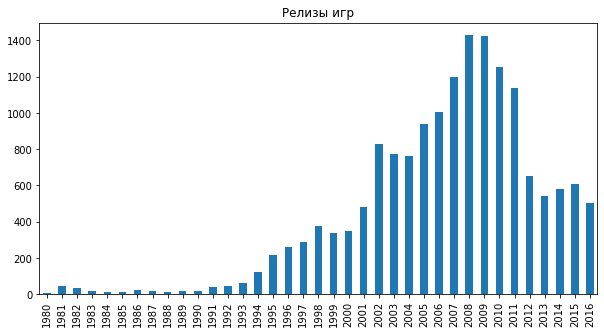

In [26]:
df.query('year_of_release !=1900') \
  .year_of_release.value_counts() \
  .sort_index() \
  .plot(kind='bar',figsize=(10,5),title='Релизы игр');

По графику видим, что появившись в 80-х годах и медленно развиваясь до 1994 (что, скорее всего, было связано как с отсутствием технических возможностей у производителей,  так и покупательских у потребителей) игры начали стремительный рост до 2008/2009, где достигли своего пика. 

С 2010 наблюдается спад который может быть связан с насыщением рынка, развитием социальных сетей (больше времени в соц.сетях, меньше времени на комп.игры). Снижение интереса у потребителей привело к угасанию интереса у производителей.

**Посмотрим как менялись продажи по платформам**

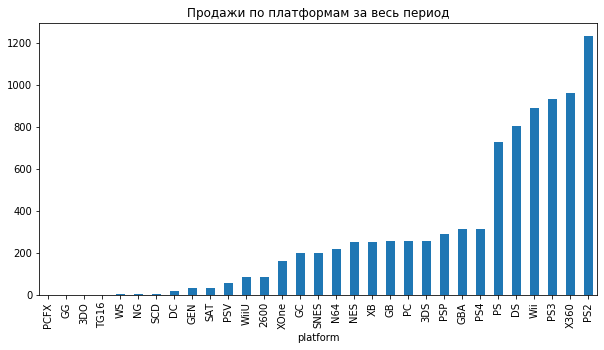

In [27]:
df.query('year_of_release !=1900') \
  .groupby(['platform'], as_index=False) \
  .total_sales.sum() \
  .sort_values('total_sales') \
  .plot(x= 'platform', y= 'total_sales', kind='bar', \
        figsize=(10,5),title='Продажи по платформам за весь период', legend= False);

Значительно опережает всех платформа PS2, что ожидаемо (разработки начались с 1999 г. и на настоящий момент она признана наиболее быстро продаваемой и самой популярной игровой консолью в истории).
Следом, с незначительным снижением последовательно идут Xbox360, PS3, Wii, DS и замыкает, перед большим падением в продажах PS.

**Построим распределение по годам платформ с наибольшими суммарными продажами**

In [28]:
df.query('year_of_release !=1900') \
   .groupby('platform', as_index=False) \
   .total_sales.sum() \
   .sort_values(by='total_sales', ascending=False).head(10)

,platform,total_sales
16,PS2,1233.56
28,X360,961.24
17,PS3,931.34
26,Wii,891.18
4,DS,802.78
15,PS,727.58
18,PS4,314.14
6,GBA,312.88
19,PSP,289.53
2,3DS,257.81


platform,DS,PS,PS2,PS3,Wii,X360
year_of_release,,,,,,
1985,0.02,NaN,NaN,NaN,NaN,NaN
1994,NaN,6.03,NaN,NaN,NaN,NaN
1995,NaN,35.96,NaN,NaN,NaN,NaN
1996,NaN,94.70,NaN,NaN,NaN,NaN
1997,NaN,136.17,NaN,NaN,NaN,NaN
1998,NaN,169.49,NaN,NaN,NaN,NaN
1999,NaN,144.53,NaN,NaN,NaN,NaN
2000,NaN,96.37,39.17,NaN,NaN,NaN
2001,NaN,35.59,166.43,NaN,NaN,NaN


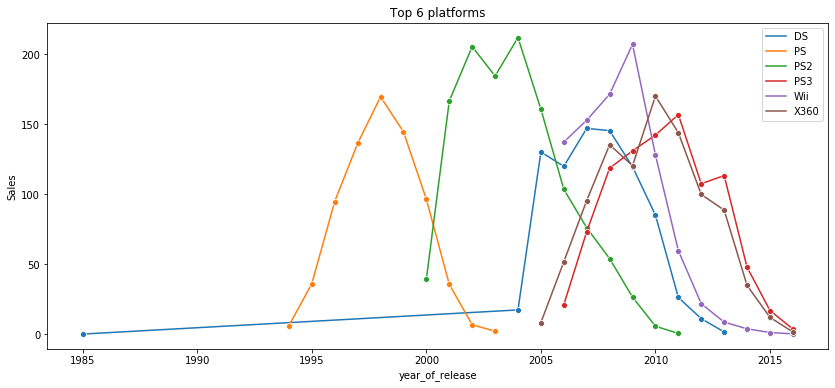

In [29]:
#Выведем отдельно топ-6 платформ для дальнейшей аналитики

top_6 = df.query('year_of_release !=1900 & platform in ("PS2","X360","PS3","Wii","DS","PS")') \
  .pivot_table(index = 'year_of_release', columns = 'platform', values = 'total_sales', aggfunc = 'sum') \


plt.figure(figsize=(14,6))
plt.title("Top 6 platforms")
sns.lineplot(data=top_6,marker='o',dashes=False)
plt.ylabel('Sales');

top_6

Разберёмся с продолжительностью использования приставок.

•DS - выглядит как самая "живучая". Выпущена в 1985, но с 1985 до 2004 года данных по ней нет, возможно их просто не собирали. И с 2004 года популярность стала расти, с пиком в 2008 и резким падением после 2010 - 6 лет активного использования.

•PS - появилась в 1994 и "прожила" почти 10 лет. Дальше иннициативу у неё перехватила PS2. 

•PS2 - появилась в 2000  и с двумя активными пиками просуществовала до 2011 года - 11 лет.

•PS3 - появилась в 2006 и существует до конца рассматриваемого периода, но также видно что сильно сдаёт свои позиции. 10 лет.

•Wii - так же появившись в 2006, и существуя до конца рассматриваемого периода, ушла в крутое пике. Так же 11 лет.

Видим, что в среднем приставку используют около 10,5 лет. Новые релизы приставок следующего поколения оказывают на это самое непосредственное влияние, что прослеживается на примере PS, что в прочем закономерно, так как старые приставки перестают отвечать новым техническим требованиям. В данной индустрии эти обновления естественны.

**Нам известно, что данные за  2016 год не полные. Кроме того, уже имея представление из предварительного анализа о том, что индустрия пошла вниз, не имеет смысла для дальнейшей аналитики рассматривать весь имеющийся период с 1985 года.**

**Так же считаю, что после 2011 года наблюдается явное снижение продаж, и пока нет никакой динамики на восстановление продаж в прежних параметрах.**

**Поэтому, чтобы исключить значимое искажение распределения, в дальнейшем буду рассматривать период с 2012 по 2016 годы. Показатели после 2012 близки и соизмеримы.**

In [30]:
#Создадим новый датафрейм с которым продолжим работать

games = df.query('year_of_release != 1900 & (year_of_release >=2012)')
games.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
6172,Payday 2,PS4,2015,Shooter,0.10,0.14,0.00,0.05,-0.01,-0.01,NaN,0.29
16313,Bakumatsu Rock,PSP,2014,Action,0.00,0.00,0.01,0.00,-0.01,-0.01,NaN,0.01
14827,Putty Squad,PSV,2013,Platform,0.01,0.01,0.00,0.01,-0.01,8.20,E10+,0.03
8265,Madden NFL 17,X360,2016,Sports,0.14,0.02,0.00,0.02,-0.01,0.70,E,0.18
469,FIFA 14,PS4,2013,Sports,0.61,1.85,0.11,0.44,87.00,6.30,E,3.01
10927,Minecraft: Story Mode,PC,2015,Adventure,0.02,0.06,0.00,0.01,-0.01,-0.01,NaN,0.09
10605,Resident Evil: Revelations 2,PSV,2015,Action,0.00,0.03,0.07,0.01,65.00,7.80,M,0.11
16615,Balloon Pop 2,3DS,2012,Puzzle,0.01,0.00,0.00,0.00,-0.01,-0.01,E,0.01
15271,F1 Race Stars,PC,2012,Racing,0.00,0.02,0.00,0.00,62.00,5.40,E,0.02
14001,Assassin's Creed Chronicles: China,PS4,2015,Action,0.00,0.03,0.00,0.01,69.00,6.40,T,0.04


**Определим какие платформы лидируют по продажам и какие платформы потенциально прибыльные?**

In [31]:
top_platforms = games.pivot_table(index = 'platform',columns = 'year_of_release', \
                                  values = 'total_sales', aggfunc = 'sum') \
                .reset_index() \
                .sort_values([2016,2015,2014,2013,2014],ascending = [False, False, False,False,False]) \
                .style.highlight_max()
top_platforms

year_of_release,platform,2012,2013,2014,2015,2016
4,PS4,nan,25.990000,100.000000,118.900000,69.250000
10,XOne,nan,18.960000,54.070000,60.140000,26.150000
0,3DS,51.360000,56.570000,43.760000,27.780000,15.140000
2,PC,23.220000,12.380000,13.280000,8.520000,5.250000
8,WiiU,17.560000,21.650000,22.030000,16.350000,4.600000
6,PSV,16.190000,10.590000,11.900000,6.250000,4.250000
3,PS3,107.360000,113.250000,47.760000,16.820000,3.600000
9,X360,99.740000,88.580000,34.740000,11.960000,1.520000
7,Wii,21.710000,8.590000,3.750000,1.140000,0.180000
5,PSP,7.690000,3.140000,0.240000,0.120000,nan


Помним, что данные за 2016 год не полные.

Видим, что в лидерах PS4, следом за ней XOne и 3DS. 

PS3 сильно сдаёт позиции после выхода PS4, вкладываться в неё нет смысла так как тенденция к снижению скорее всего продолжится. Даже если учесть, что средняя продолжительность "жизни" приставки 10,5 лет, PS4 растет слишком агресивно, а PS3 сильно проседает год от года.

Не ясная ситуация по WiiU, возможно это связано с тем, что данные за 2016 год не полные, не будем от сбрасывать её со счетов, так как падение в 2016 возможно будет не сильным. 

X360 просела за последнее время значительно. Остальные - не представляют интереса как потенциально прибыльные.

**Построим "ящики с усами" по глобальным продажам каждой игры и разбивкой по платформам**

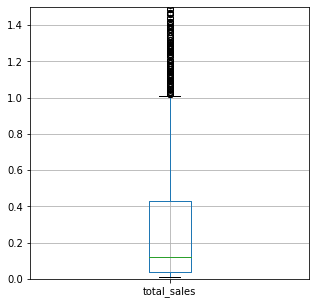

In [32]:
box_global=games.boxplot(column='total_sales',figsize = (5,5)).set_ylim(0, 1.5)

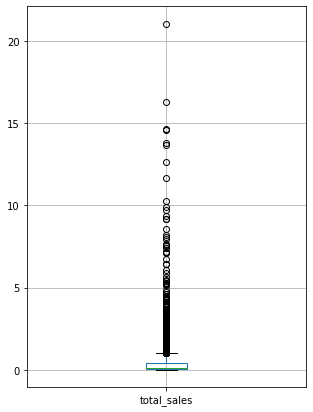

In [33]:
#Посмотрим на весь хвост выбросов

box_global=games.boxplot(column='total_sales',figsize = (5,7))

В среднем, продажи игр чуть больше 1 млн долларов, а медиана составляет 0,1 миллиона долларов.Выглядит так как будто основное количество игры выпускаются не для высоких заработков, и это не крупные игроки рынка. А крупные обитают в выбросах, и их не так уж и мало.

**Посмотрим на разбивку по платформам**

In [34]:
games_platforms = games.loc[:,['platform','total_sales']]
games_platforms.groupby('platform').agg({'total_sales':['min','median','mean','max']})

total_sales                        
                 min median      mean    max
platform                                    
3DS             0.01   0.11  0.491439  14.60
DS              0.01   0.05  0.404839   8.06
PC              0.01   0.08  0.250600   5.14
PS3             0.01   0.20  0.585781  21.05
PS4             0.01   0.20  0.801378  14.63
PSP             0.01   0.03  0.064682   0.36
PSV             0.01   0.05  0.119659   1.96
Wii             0.01   0.18  0.655000   6.76
WiiU            0.01   0.22  0.559116   7.09
X360            0.01   0.31  0.810068  16.27
XOne            0.01   0.22  0.645020   7.39

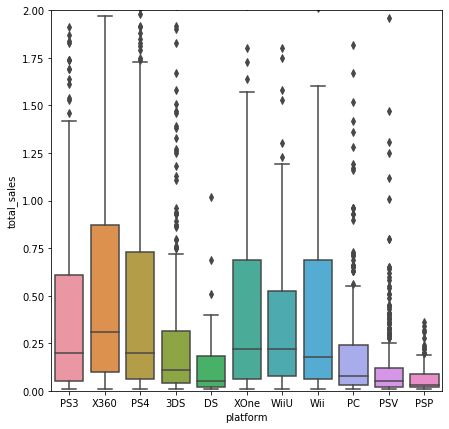

In [35]:
plt.figure(figsize=(7, 7))
sns.boxplot(data=games_platforms, x='platform', y='total_sales').set_ylim(0,2);

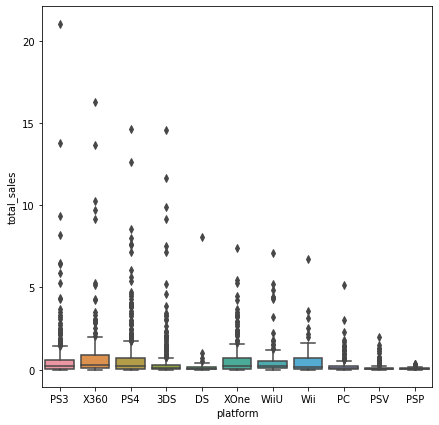

In [36]:
#Общий вид с выбросами
plt.figure(figsize=(7, 7))
sns.boxplot(data=games_platforms, x='platform', y='total_sales');

Наибольшие сборы у PS3, X360, PS4, XOne, WiiU и Wii.
Медиана по топовым платформам находится от 0,2 до 0,31 млн долларов сборов.
Самая верхняя граница предела у X360 около 2 млн долларов.
Кроме того, самый большоей выброс в 21 млн долларов у PS3.
Так же привлекает внимание 3DS с выбросом в 14,6 млн при медиане 0,11. Покемоны рулят))
Самые низкие показатели у PSP, с медианой в 0,03 млн и максимальным значением 0,36 млн долларов соответственно. 


**Изучим отзывы пользователей и критиков**

Для анализа возьмем платформу Х360. Она давно на рынке, по ней есть данные и за 2016 год тоже + по ней интересная динамика с двумя яркими пиками (будет интересно посмотреть связано это с оценками или нет).

Сначала посмотрим на корреляцию оценок пользователей и выручки

In [37]:
#Уберём при выборке заполненные нами пустые значения на номинальные -0,01
users_sc_x360 = games.query('platform=="X360" & user_score !=-0.01')

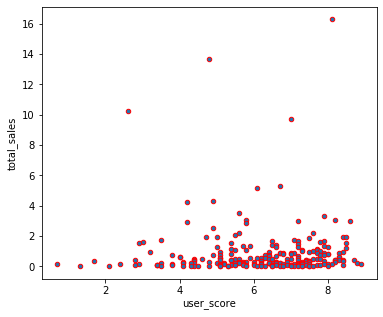

In [38]:
users_sc_x360.plot(kind='scatter', x='user_score',y='total_sales', figsize=(6,5), ec='red');

Много выбросов. Игры  неплохо продаются и заметно влияние отзывов пользователей. Но также видно, что когда рейтинг пользователей не велик, игры и в этом случае собирают большую выручку.

Теперь посмотрим на корреляцию оценок критиков и выручки

In [39]:
#Уберём при выборке заполненные нами пустые значения на номинальные -0,01
critic_sc_x360 = games.query('platform=="X360" & critic_score !=-0.01')

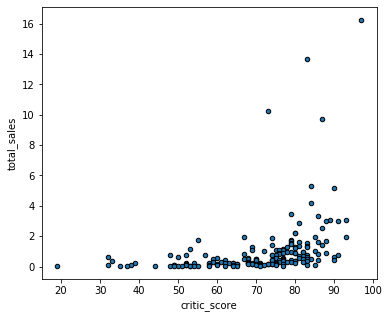

In [40]:
critic_sc_x360.plot(kind='scatter', x='critic_score',y='total_sales', figsize=(6,5), ec='black');

Похожая картина, с увеличением рейтинга критиков увеличиваются и продажи. Здесь взаимосвязь посильнее чем от оценок пользователей. Видимо к их мнению всё-таки прислушиваются.

Теперь посмотрим на соотношение общих продаж к оценкам пользователей и критиков.

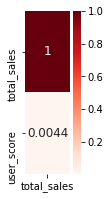

In [41]:
user_score = games.loc[:,['platform','user_score','total_sales']] \
.query('user_score !=-0.01') 

plt.figure(figsize=(1,3))
sns.heatmap(user_score.corr()[['total_sales']] \
            .sort_values(by='total_sales', ascending=False),cmap="Reds", annot=True, annot_kws={'size':12});

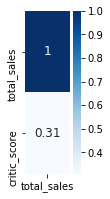

In [42]:
critic_score = games.loc[:,['platform','critic_score','total_sales']] \
.query('critic_score !=-0.01')

plt.figure(figsize=(1,3))
sns.heatmap(critic_score.corr()[['total_sales']] \
            .sort_values('total_sales', ascending=False), cmap="Blues", annot=True, annot_kws={'size':12});

В общих продажах аналогичная картина. 

БОльшее влияние на продажи оказывает мнение критиков и черезвычайно мало влияют оценки пользователей.

Посмотрим на корреляцию этих факторов по платформам.

Так как при замене пустых значений было заполнено больше отсутствующих значений по critic_score, чем по user_score, во избежание искажения данных проведём анализ отдельно по каждой оценке.

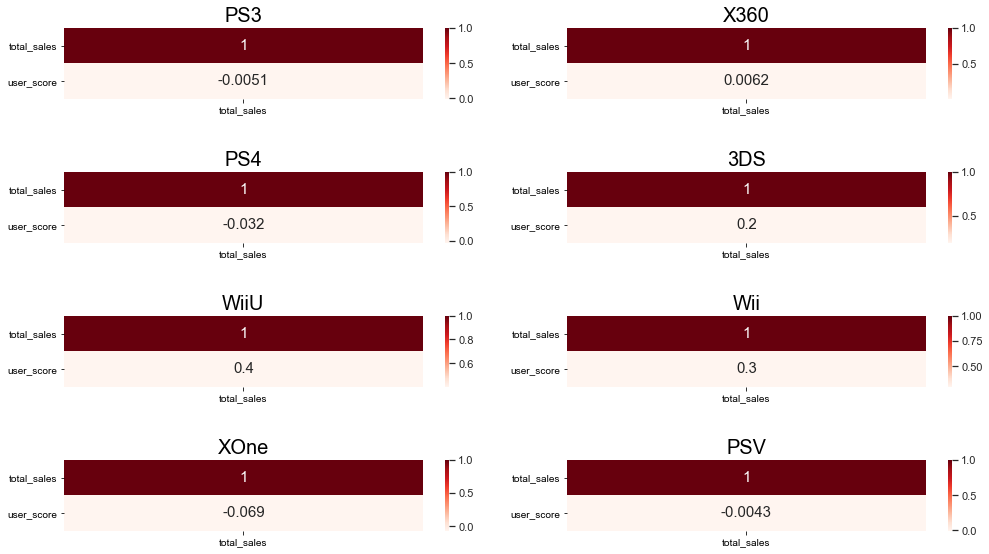

In [43]:
#Корреляция по платформам оценок пользователей и продаж

all_platforms = ['PS3', 'X360', 'PS4', '3DS', 'WiiU', 'Wii', 'XOne','PSV']

rows = 4
cols = 2
fig, axes = plt.subplots(rows, cols, figsize=(15,8.5))
count = 0
for row in range(rows):
    for column in range(cols):
        platform = all_platforms[count]
        df_us_sc = user_score[(user_score['platform'] == platform)]
        
        us_sc = df_us_sc[['total_sales' ,'user_score']]
        sns.set(font_scale=1.0)
        ax = sns.heatmap(us_sc.corr()[['total_sales']].sort_values(by='total_sales', ascending=False), 
                       cmap="Reds", annot=True, annot_kws={'size':15}, ax=axes[row,column])
        ax.set_title(platform, fontsize=20)
        ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
        plt.tight_layout(pad=3)
        count += 1

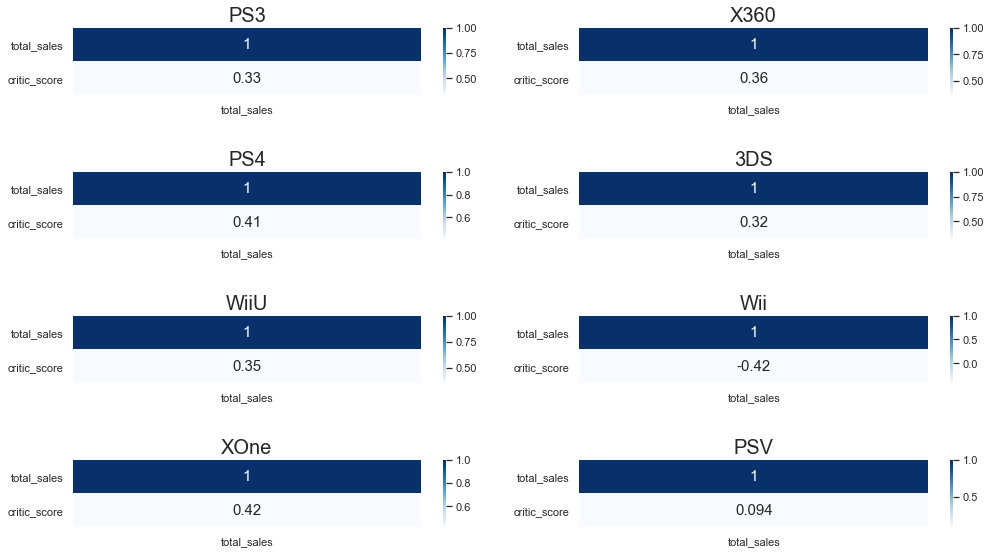

In [44]:
#Корреляция по платформам оценок критиков и продаж

all_platforms = ['PS3', 'X360', 'PS4', '3DS', 'WiiU', 'Wii', 'XOne','PSV']

rows = 4
cols = 2
fig, axes = plt.subplots(rows, cols, figsize=(15,8.5))
count = 0
for row in range(rows):
    for column in range(cols):
        platform = all_platforms[count]
        df_cr_sc = critic_score[(critic_score['platform'] == platform)]
        
        cr_sc = df_cr_sc[['total_sales' ,'critic_score']]
        sns.set(font_scale=1.0)
        ax = sns.heatmap(cr_sc.corr()[['total_sales']].sort_values(by='total_sales', ascending=False), 
                       cmap="Blues", annot=True, annot_kws={'size':15}, ax=axes[row,column])
        ax.set_title(platform, fontsize=20)
        ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
        plt.tight_layout(pad=3)
        count += 1

По всем платфорам, кроме  WiiU и 3DS, где влияние оценок критиков и пользователей близко, прослеживается таже тенденция -  бОльшее влияние на продажи оказывает мнение критиков.

Обратим внимание на Wii, единственная платформа где оценка критиков привела к отрицательной корреляции.
Разберёмся почему

In [45]:
critic_score.groupby('platform').agg({'critic_score':'count'})

,critic_score
platform,
3DS,104
DS,1
PC,198
PS3,214
PS4,252
PSP,1
PSV,107
Wii,5
WiiU,90


In [46]:
user_score.groupby('platform').agg({'user_score':'count'})

,user_score
platform,
3DS,114
DS,3
PC,206
PS3,283
PS4,257
PSP,4
PSV,130
Wii,17
WiiU,100


Вот и ответ, слишком мало данных для нормальной оценки. Следовало её исключить из анализа вместе с платформами DS и PSP.

**Посмотрим на общее распределение игр по жанрам**

In [47]:
genre_game = games.groupby('genre').agg({'name':'count','total_sales':'sum'}).sort_values('name', ascending = False)
genre_game['mean'] = round((genre_game.total_sales/genre_game.name),2)

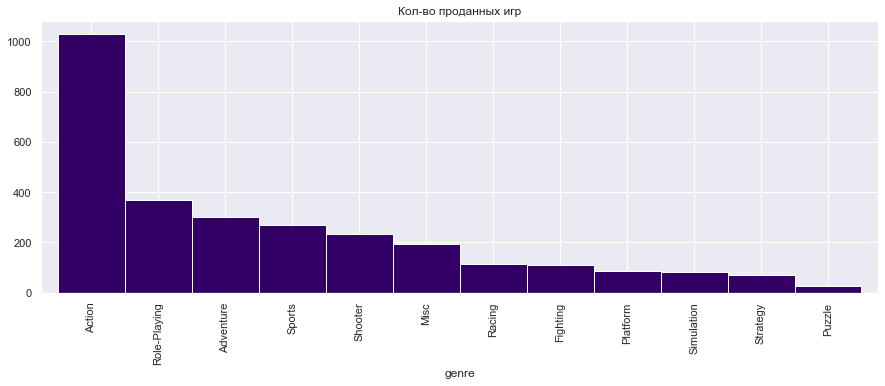

In [48]:
plot_1=genre_game['name']
plot_1.plot(kind = 'bar',figsize = (15,5),width=1, color='#330066', title = 'Кол-во проданных игр');

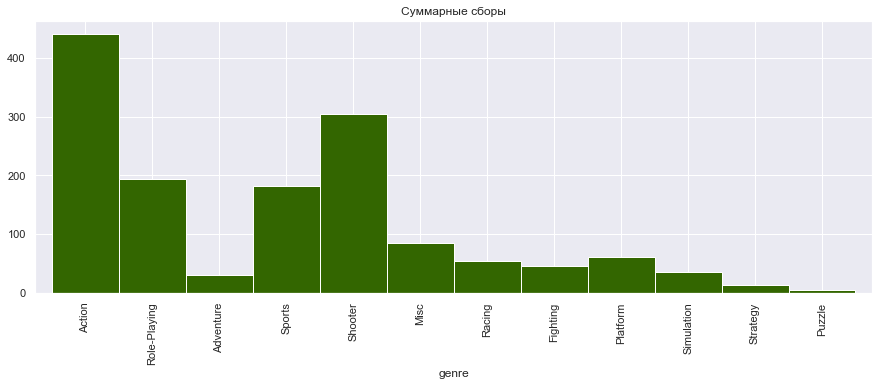

In [49]:
plot_2=genre_game['total_sales']
plot_2.plot(kind = 'bar',figsize = (15,5),width=1, color = '#336600', title='Суммарные сборы');

In [50]:
#Средняя выручка на игру
genre_game.sort_values('mean', ascending=False)

,name,total_sales,mean
genre,,,
Shooter,235,304.73,1.30
Platform,85,61.00,0.72
Sports,268,181.07,0.68
Role-Playing,370,192.80,0.52
Racing,115,53.50,0.47
Misc,192,85.04,0.44
Simulation,80,35.12,0.44
Action,1031,441.12,0.43
Fighting,109,44.49,0.41


С большим отрывом по количеству продаж лидируют Action, а вот выручка у него лишь примерно на 30% больше чем у Shooter, что примечательно так как и тот и другой жанр является весьма затратным в производстве. 
Далее по количеству продаж идут соответственно Role-Playing, Adventure и Sports.

Что касается сумм продаж, ситуация иная - лидерам, как уже было указано являются Action и Shooter, за ними,близкие по продажам Role-Playing и Sports.

Strategy и Puzzle в обоих случаях являются аутсайдерами, видимо это связано с тем что данные игры требуют усидчивости.

Если смотреть на данные в разрезе выручка на единицу, то Shooter ещё и самый привлекательный жанр по выручке. За ним следует не упоминавшийся ранее Platform и далее Sports и Role-Playing. Видимо количество игр в жанре Action "размывает" выручку на единицу проданной игры.


## Портрет пользователя для каждого региона <a class="anchor" id="fourth-bullet"></a>
<font size="2">([к содержанию](#0.0))</font>

**Определим самые популярные платформы (топ 5)**

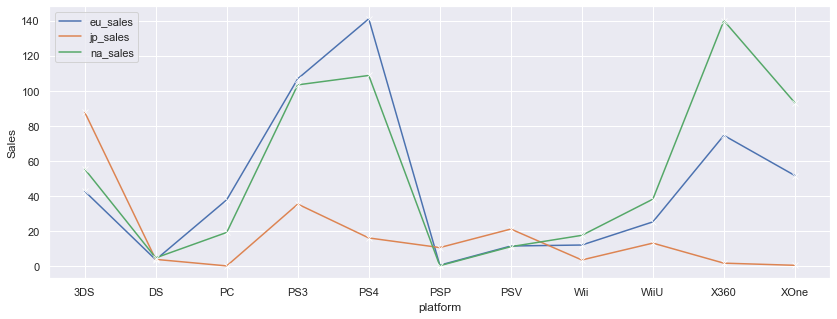

In [51]:
platforms = games.pivot_table(index= 'platform', \
                           values = ['na_sales','eu_sales','jp_sales'], aggfunc = 'sum')

plt.figure(figsize=(14,5)) 
sns.lineplot(data=platforms,marker='x',dashes=False) 
plt.ylabel('Sales');

In [52]:
platforms.style.background_gradient()

,eu_sales,jp_sales,na_sales
platform,,,
3DS,42.640000,87.790000,55.310000
DS,3.530000,3.720000,4.590000
PC,37.760000,0.000000,19.120000
PS3,106.860000,35.290000,103.380000
PS4,141.090000,15.960000,108.740000
PSP,0.420000,10.470000,0.130000
PSV,11.360000,21.040000,10.980000
Wii,11.920000,3.390000,17.450000
WiiU,25.130000,13.010000,38.100000


Видим, что в топ 5, по рассматриваемым рынкам входят PS4, PS3, X360, 3DS, XOne. 

Причем в Северной Америке со значительным перевесом лидируют приставки X360, PS3 и PS4. 

В Европе PS3 и PS4 еще более популярны и снова в тройке лидеров X360.

Япония же идёт своим путём . Лидер чисто японские 3DS. 

**Определим самые популярные жанры (топ 5)**

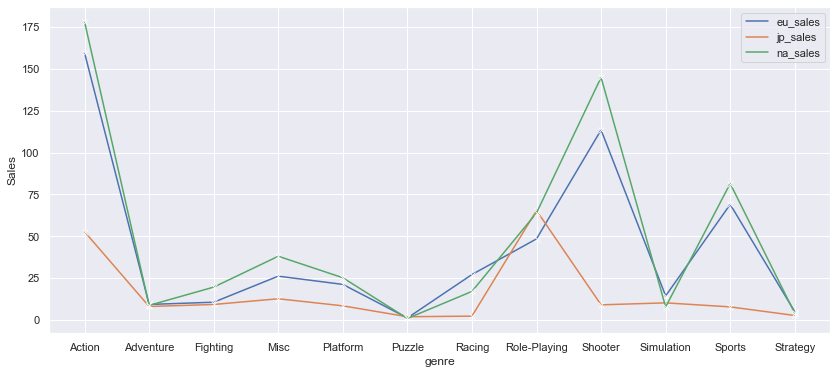

In [53]:
genres = games.pivot_table(index= 'genre', \
                           values = ['na_sales','eu_sales','jp_sales'], aggfunc = 'sum') \
         #.sort_values(['na_sales','eu_sales','jp_sales'],ascending =[False,False,False] )

plt.figure(figsize=(14,6)) 
sns.lineplot(data=genres,marker='x',dashes=False) 
plt.ylabel('Sales');

In [54]:
genres.style.background_gradient(cmap='Greens')

,eu_sales,jp_sales,na_sales
genre,,,
Action,159.340000,52.800000,177.840000
Adventure,9.460000,8.240000,8.920000
Fighting,10.790000,9.440000,19.790000
Misc,26.320000,12.860000,38.190000
Platform,21.410000,8.630000,25.380000
Puzzle,1.400000,2.140000,1.130000
Racing,27.290000,2.500000,17.220000
Role-Playing,48.530000,65.440000,64.000000
Shooter,113.470000,9.230000,144.770000


По пикам видим, что лидерами являются Action, Shooter, Sports, Role-Playing и с большим отставанием Misc. 

Предпочтения, в силу схожести культурных традиций  в Северной Америке и Европе близки, и лидерами являются приверженцы  экшнов, шутеров и спортивных игр. Причем тренд почти одинаковый, разницу можно объяснить размерами рынков продаж.

Япония частично поддерживает эти тренды. Но с большим отрывом лидируют ролевые игры и только потом аркады, экшны и спортивные игры.


**Проверим как оказывает ли влияние рейтинг ESRB на продажи по регионам**

In [55]:
#Создадим новый датафрейм для описания содержимого оценок

rating_ESRB = pd.DataFrame \
({'E': ['Для всех'], 'M': ['Для взрослых'], 'T': ['Подросткам'], 'E10+': ['Для всех от 10 лет и старше']} \
         ,index = ['ESRB_name']) \
         .transpose() \
         .reset_index() \
         .rename(columns ={'index':'rating'})
rating_ESRB

,rating,ESRB_name
0,E,Для всех
1,M,Для взрослых
2,T,Подросткам
3,E10+,Для всех от 10 лет и старше


In [56]:
#Присвоим содержимое оценок и заменим пропуски на Unknown
games_ESRB = games.merge(rating_ESRB, how = 'left') \
            .fillna({'ESRB_name':'Unknown'})
games_ESRB.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,ESRB_name
2812,Akatsuki no Goei Trinity,PSP,2012,Adventure,0.00,0.00,0.01,0.00,-0.01,-0.01,NaN,0.01,Unknown
1813,Eagle Flight,PS4,2016,Adventure,0.01,0.05,0.00,0.01,72.00,7.80,E10+,0.07,Для всех от 10 лет и старше
1523,NBA Live 16,XOne,2015,Sports,0.09,0.01,0.00,0.01,60.00,5.60,E,0.11,Для всех
2039,Adventure Time: Explore the Dungeon Because I ...,PS3,2013,Action,0.02,0.01,0.00,0.01,-0.01,-0.01,NaN,0.04,Unknown
2237,.hack: Sekai no Mukou ni + Versus,PS3,2012,Action,0.00,0.00,0.03,0.00,-0.01,-0.01,NaN,0.03,Unknown
540,LittleBigPlanet 3,PS3,2014,Platform,0.20,0.33,0.01,0.10,-0.01,7.20,E,0.64,Для всех
2419,Juusanshi Engi Engetsu Sangokuden 2,PSP,2014,Action,0.00,0.00,0.02,0.00,-0.01,-0.01,NaN,0.02,Unknown
872,Just Dance 2016,X360,2015,Misc,0.23,0.05,0.00,0.03,-0.01,6.00,E10+,0.31,Для всех от 10 лет и старше
2167,Exist Archive: The Other Side of the Sky,PS4,2015,Role-Playing,0.01,0.00,0.03,0.00,69.00,7.90,T,0.04,Подросткам
2580,Entaku no Seito: The Eternal Legend,PSP,2012,Role-Playing,0.00,0.00,0.02,0.00,-0.01,-0.01,NaN,0.02,Unknown


,na_sales,eu_sales,jp_sales
ESRB_name,,,
Unknown,103.310000,91.500000,108.840000
Для взрослых,231.570000,193.960000,21.200000
Для всех,114.370000,113.030000,28.330000
Для всех от 10 лет и старше,75.700000,55.370000,8.190000
Подросткам,66.020000,52.960000,26.020000


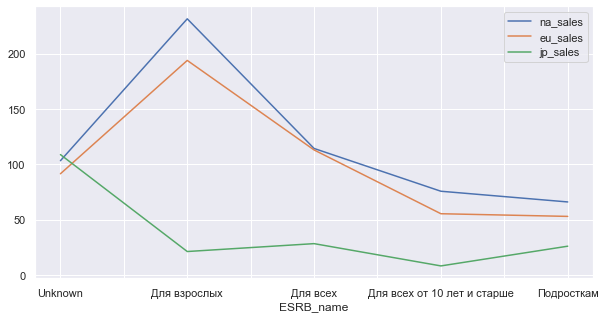

In [57]:
#Смотрим на влияние рейтингов

ratings = games_ESRB.groupby('ESRB_name').agg({'na_sales':'sum','eu_sales':'sum','jp_sales':'sum'})
          
ratings.plot(figsize=(10,5));

ratings.style.background_gradient(cmap='BuGn')

Как и в предыдущих случаях картина по Северной Америке и Европе близка.

Ниибольшие продажи принесли игры с рейтингом "Для взрослых", далее по нисходящей, со значительным спадом следуют "Для всех" и "Для всех от 10 лет и старше". Почти вровень с последней идут игры с рейтингом "Подросткам".

В Японии же почти одинаковое распределение сборов у рейтингов "Для всех" и "Подросткам", за ними с незначительным отстованием следуют игры "Для взрослых".

Нужно также отметить большую долю в выручке игр без рейтингов ESRB, она близка для всех трёх рынков

## Статистические исследования  рейтингов пользователей и критиков в различных жанрах <a class="anchor" id="fifth-bullet"></a>
<font size="2">([к содержанию](#0.0))</font>

Так как при замене отсутсвующих значений пришлось заменить на индикативное -0,01 больше данных по critic_score, чем по user_score, работать будем с отдельными датафреймами.

In [58]:
#Создадим датафрейм для оценок пользователей и исключим (во избежание искажения данных) индикативные -0,01

genre_us_score = games.loc[:,['genre','user_score']].query('user_score !=-0.01').sort_values('genre')
genre_us_score.sample(3)

,genre,user_score
1831,Role-Playing,9.2
10821,Platform,6.0
15211,Adventure,9.0


In [59]:
#Посмотрим на основные статистики в целом 
genre_us_score.agg({'mean','var','std','median'})

,user_score
median,7.000000
var,2.461864
mean,6.636120
std,1.569033


In [60]:
#И пожанрово
genre_us_score.groupby('genre').agg({'mean','var','std','median','min','max'})

user_score                                     
                    std       var      mean  min median  max
genre                                                       
Action         1.374440  1.889084  6.825048  1.6   7.10  9.1
Adventure      1.277652  1.632394  7.466667  2.9   7.55  9.3
Fighting       1.431269  2.048532  6.895714  2.1   7.40  8.7
Misc           1.257939  1.582411  6.938806  2.4   7.00  8.7
Platform       1.654447  2.737193  6.806061  2.9   7.20  9.0
Puzzle         0.888819  0.790000  7.633333  6.2   7.90  8.6
Racing         1.667597  2.780881  6.151163  1.0   6.30  9.1
Role-Playing   1.278637  1.634913  7.258480  1.4   7.50  9.3
Shooter        1.437188  2.065509  6.435897  2.6   6.70  8.9
Simulation     1.812585  3.285465  6.511905  2.2   7.05  8.9
Sports         1.738646  3.022890  5.455897  0.2   5.70  8.8
Strategy       2.030908  4.124588  6.420000  2.0   7.10  8.7

In [61]:
#Посмотрим сколько вообще было выставено оценок жанрам
genre_us_score.value_counts(['genre'])

genre       
Action          523
Shooter         195
Sports          195
Role-Playing    171
Racing           86
Adventure        72
Fighting         70
Misc             67
Platform         66
Simulation       42
Strategy         35
Puzzle            9
dtype: int64

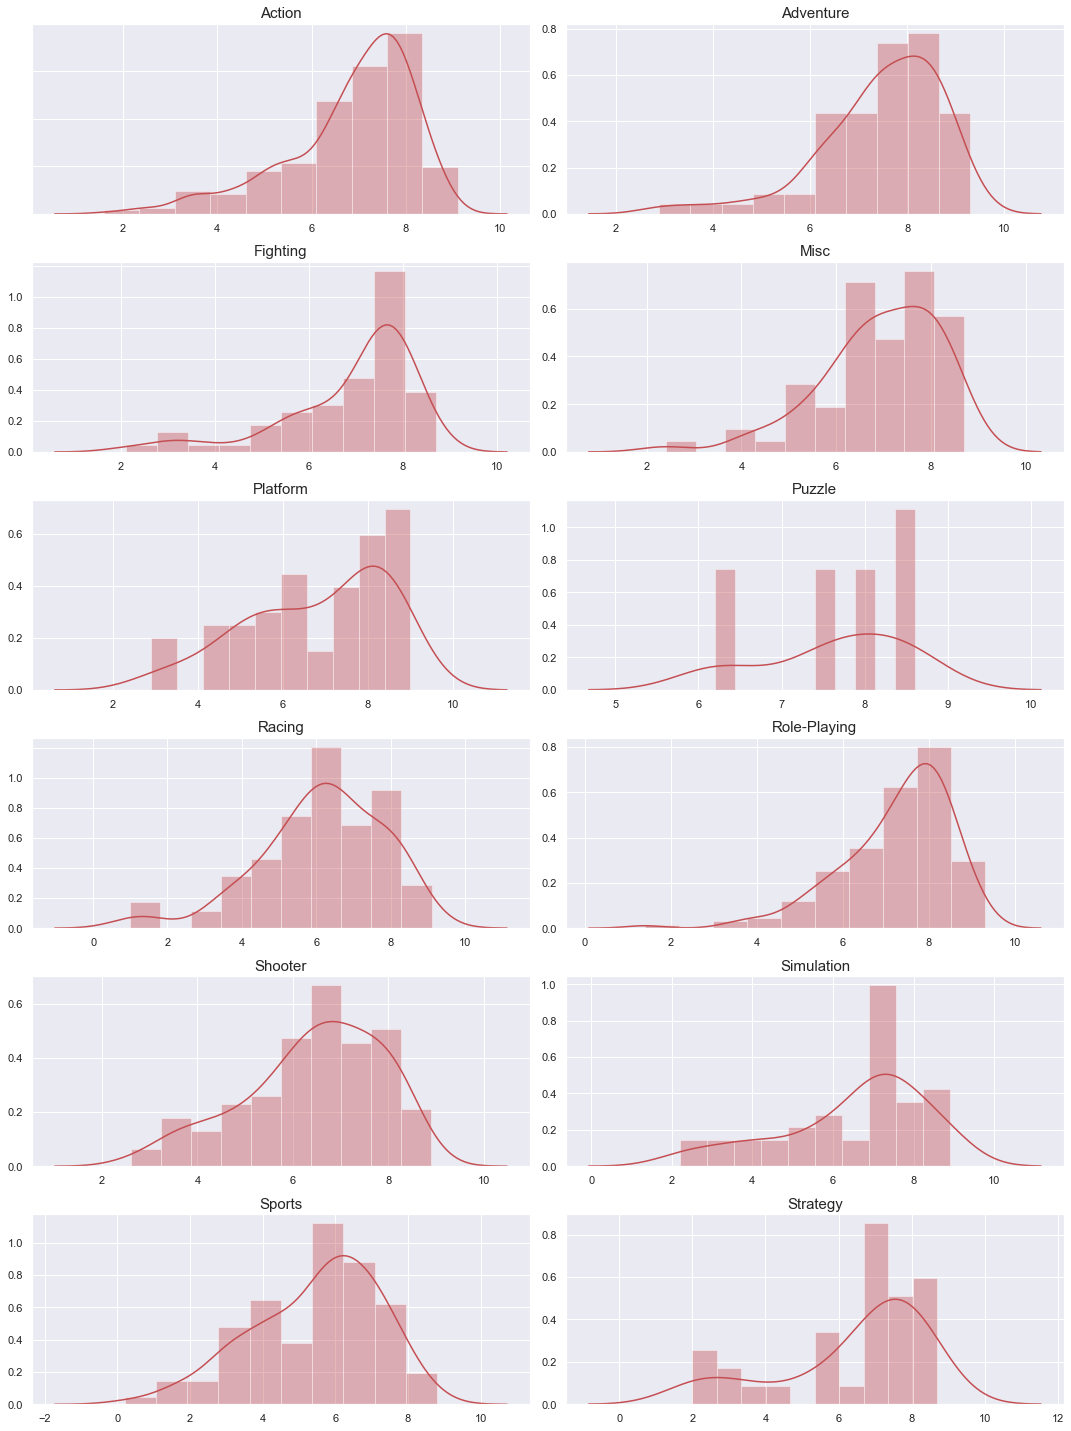

In [62]:
#Выведем графики распределения

top_genres = ['Action','Adventure','Fighting','Misc','Platform','Puzzle','Racing', \
         'Role-Playing','Shooter','Simulation','Sports','Strategy']

rows = 6
cols = 2
fig, axes = plt.subplots(rows, cols, figsize=(15,20))
count = 0
for r in range(rows):
    for c in range(cols):
        curr_genre = top_genres[count]
        df_prep_us = games[(games['genre'] == curr_genre) & (games['user_score'] > 0)].copy()
        
        df_filtered_us = df_prep_us[['user_score']]
        sns.set(font_scale=1.2)
        ax = sns.distplot(df_filtered_us, ax=axes[r,c], color="r", bins=10)
        ax.set_title(curr_genre, fontsize=15)
        ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
        plt.tight_layout(pad=0.8)
        count += 1

Медианное значение у всех (каждого) жанров колеблется около 7,у многих выше медианного значения по всем жанрам совокупно. Только Sports отстает с медианным значением в 5,7. Больше всего оценок, как и следовало ожидать, учитывая популярность, у жанра Action; распределение смещено вправо - положительных оценок больше. Следом по количеству оценок идут Shooter, Sports, Role-Playing - также популярные жанры. Sports выделяется наличием самых низких оценок из всех представленных жанров. А Puzzle хотя и мало оценивались разброс оценок самый узкий. Разброс остальных жанров примерно одинаковы. Все распределения положительно скошены, высокие оценки преобладают.

Проделаем аналогичные действия для оценок критиков

In [63]:
genre_cr_score = games.loc[:,['genre','critic_score']].query('critic_score !=-0.01').sort_values('genre')
genre_cr_score.sample(3)

,genre,critic_score
4206,Action,81.0
14629,Shooter,59.0
15734,Action,48.0


In [64]:
genre_cr_score.agg({'mean','var','std','median'})

,critic_score
median,74.000000
var,160.962172
mean,72.258384
std,12.687087


In [65]:
genre_cr_score.groupby('genre').agg({'mean','var','std','median','min','max'})

critic_score                                          
                      std         var       mean   min median   max
genre                                                              
Action          12.093748  146.258753  71.378440  24.0   73.0  97.0
Adventure       11.000956  121.021040  72.661017  43.0   72.0  93.0
Fighting        13.407791  179.768849  70.406250  23.0   74.0  86.0
Misc            10.054208  101.087093  72.807018  38.0   75.0  86.0
Platform        13.713845  188.069550  74.610169  38.0   78.0  93.0
Puzzle           6.948221   48.277778  75.444444  68.0   71.0  88.0
Racing          12.543677  157.343827  71.864198  13.0   75.0  91.0
Role-Playing    12.282509  150.860016  73.049689  36.0   74.0  93.0
Shooter         12.445275  154.884864  73.421965  32.0   76.0  94.0
Simulation      13.556151  183.769231  66.615385  33.0   70.0  88.0
Sports          15.473154  239.418497  72.895105  19.0   77.0  90.0
Strategy        12.515968  156.649462  75.870968  47.0   80.0  90.0

In [66]:
genre_cr_score.value_counts(['genre'])

genre       
Action          436
Shooter         173
Role-Playing    161
Sports          143
Racing           81
Fighting         64
Adventure        59
Platform         59
Misc             57
Simulation       39
Strategy         31
Puzzle            9
dtype: int64

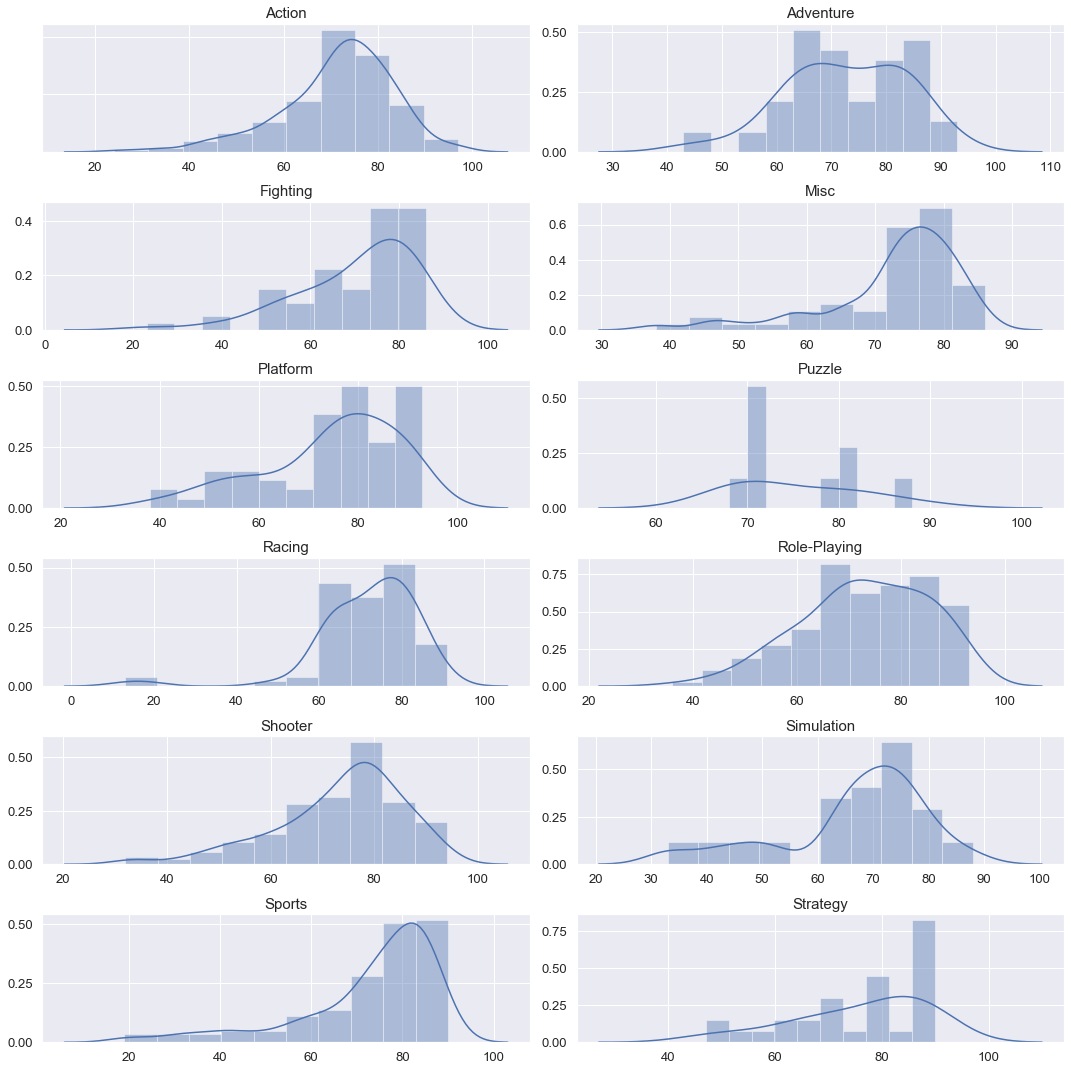

In [67]:
top_genres = ['Action','Adventure','Fighting','Misc','Platform','Puzzle','Racing', \
         'Role-Playing','Shooter','Simulation','Sports','Strategy']

rows = 6
cols = 2
fig, axes = plt.subplots(rows, cols, figsize=(15,15))
count = 0
for r in range(rows):
    for c in range(cols):
        curr_genre = top_genres[count]
        df_prep_cs = games[(games['genre'] == curr_genre) & (games['critic_score'] > 0)].copy()
        
        df_filtered_cs = df_prep_cs[['critic_score']]
        sns.set(font_scale=1.2)
        ax = sns.distplot(df_filtered_cs, ax=axes[r,c], color="b",bins=10)
        ax.set_title(curr_genre, fontsize=15)
        ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
        plt.tight_layout(pad=0.8)
        count += 1

Распределения оценок критиков интереснее, хотя в основной массе и повторяют оценки пользователей. 
Медианное значение у всех (каждого) жанров колеблется около 74 и оно близко к медианному значению по всем жанрам совокупно.Также больше всего оценок у жанра Action. Следом по количеству оценок идут Shooter, Sports, Role-Playing - также популярные жанры. Здесь самые низкие оценки у Racing и Sports. Причем распределение у Racing с прогалом очень низких оценок. Похоже на него и распределение Simulation с отдельным островком оценок - видимо игры или были так себе, или добротные. У этого же жанра самая низкая медиана в 70 балов. А самые высокие в 80 и 78 соответственно у Strategy и Platform. У распределения Adventure признаки "плато". Больше всего разнообразных оценок у Misc. Как и у оценок пользователей все распределения положительно скошены, высокие оценки преобладают.

## Проверка гипотез <a class="anchor" id="sixth-bullet"></a>
<font size="2">([к содержанию](#0.0))</font>



### Гипотеза. 

Нулевая гипотеза. **Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

Альтернативная гипотеза. **Средние пользовательские рейтинги платформ Xbox One и PC различаются**



In [68]:
#Будем работать с датафреймом для этих двух платформ, очищенном от индкативных -0,01
two_platforms = games.loc[:,['platform','user_score']].query('user_score !=-0.01 & platform in("XOne","PC")')
two_platforms.sample(10)

,platform,user_score
5230,XOne,7.7
11222,XOne,3.1
8491,XOne,4.4
9674,PC,8.2
4368,PC,4.7
15407,PC,3.7
16392,XOne,6.3
15483,PC,2.4
8589,PC,6.4
16025,PC,4.3


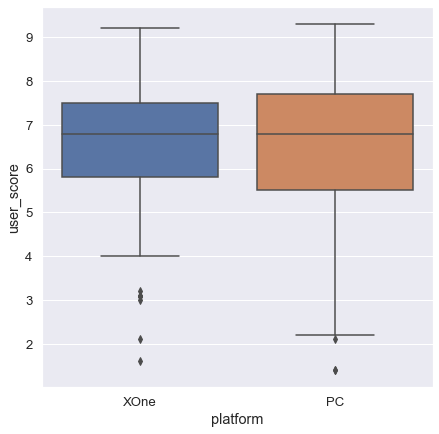

In [69]:
#Посмотрим на бокс-плоты
plt.figure(figsize=(7, 7))
sns.boxplot(data=two_platforms, x='platform', y='user_score');

В принципе уже видно, что Нулевая гипотеза не может быть отклонена, так как среднее первого попадает в доверительный интервал второго. Но проведём весь анализ целиком

Посмотрим на доверительные интервалы

In [70]:
#Введем переменные для расчета
n_XOne = two_platforms.query('platform == "XOne"').platform.count()
n_PC = two_platforms.query('platform == "PC"').platform.count()
std_XOne = statistics.stdev(two_platforms.query('platform == "XOne"').user_score.tolist())
std_PC = statistics.stdev(two_platforms.query('platform == "PC"').user_score.tolist())
mean_XOne = statistics.mean(two_platforms.query('platform == "XOne"').user_score.tolist())
mean_PC = statistics.mean(two_platforms.query('platform == "PC"').user_score.tolist())

#Напишем формулу
'''
mean - среднее 
sd - стандартное отклонение в выборке
n - количество выборочных значений
accuracy - точность интервала (может быть равен 95 или 99)
'''

def conf_interval(mean, sd, n, accuracy):
    se = sd/(n**(1/2))
    if accuracy == 95:
        left = mean - se*1.96
        right = mean + se*1.96
        print(f'Доверительный интервал : [{round(left,2)} ; {round(right,2)}]')
    elif accuracy == 99:
        left = mean - se*2.58
        right = mean + se*2.58
        print(f'Доверительный интервал : [{left} ; {right}]')
        

         
print("Доверительные интервалы для XOne и PC соответственно")        
conf_interval(mean_XOne, std_XOne, n_XOne, 95)
conf_interval(mean_PC, std_PC, n_PC, 95)

Доверительные интервалы для XOne и PC соответственно
Доверительный интервал : [6.32 ; 6.72]
Доверительный интервал : [6.2 ; 6.66]


Избавимся от выбросов

In [71]:
q1_XOne = two_platforms.query('platform =="XOne"').user_score.quantile(0.25)
q3_XOne = two_platforms.query('platform =="XOne"').user_score.quantile(0.75)
igr_XOne = q3_XOne-q1_XOne #размах

q1_PC = two_platforms.query('platform =="PC"').user_score.quantile(0.25)
q3_PC = two_platforms.query('platform =="PC"').user_score.quantile(0.75)
igr_PC = q3_PC-q1_PC


clean_XOne= two_platforms[(two_platforms["user_score"] <= (q3_XOne+1.5*igr_XOne)) \
                        & (two_platforms["user_score"] >= (q1_XOne-1.5*igr_XOne)) \
                        & (two_platforms["platform"] !="PC")]
                      
clean_PC= two_platforms[(two_platforms["user_score"] <= (q3_PC+1.5*igr_PC)) \
                        & (two_platforms["user_score"] >= (q1_PC-1.5*igr_PC)) \
                        & (two_platforms["platform"] !="XOne")]

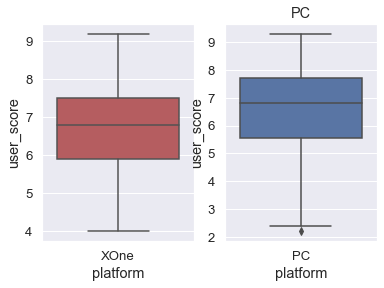

In [72]:
#Выведем бокс-плоты с "очищенными" данными
fig, axes = plt.subplots(1, 2)

box1 = plt.title('XOne')
box1 = sns.boxplot(data=clean_XOne, x='platform', y='user_score', ax=axes[0], color='r');
box2 = plt.title('PC')
box2 = sns.boxplot(data=clean_PC, x='platform', y='user_score', ax = axes[1], color="b");

Проведём проверку дисперсий двух выборок и проверим распределение на нормальность, чтобы понять каким критерием будем пользоваться для проверки гипотез.

In [73]:
#Смотрим на дисперсии
print('Дисперсия XOne', clean_XOne.var().values)
print('Дисперсия PC',clean_PC.var().values)

Дисперсия XOne [1.30642615]
Дисперсия PC [2.4634156]


Видим, что дисперсии не равны.

Теперь проверим распределения на нормальность критерием Шапиро-Уилки для каждой выборки. 

Statistics=0.982, p-value=0.027
Отклонить гипотезу о нормальности распределения


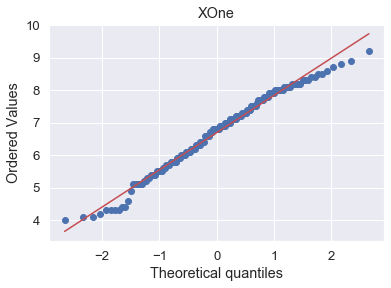

In [74]:
stats.probplot(clean_XOne['user_score'] , dist="norm", plot=plt)
plt.title('XOne');

stat, p = scipy.stats.shapiro(clean_XOne['user_score']) # тест Шапиро-Уилк
print('Statistics=%.3f, p-value=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Принять гипотезу о нормальности распределения')
else:
    print('Отклонить гипотезу о нормальности распределения')

Statistics=0.945, p-value=0.000
Отклонить гипотезу о нормальности распределения


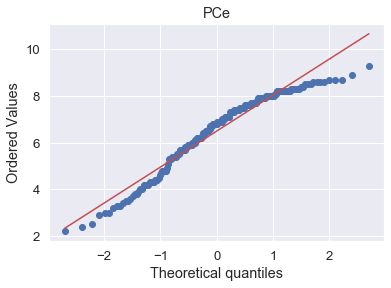

In [75]:
stats.probplot(clean_PC['user_score'] , dist="norm", plot=plt)
plt.title('PCe');

stat, p = scipy.stats.shapiro(clean_PC['user_score']) # тест Шапиро-Уилк
print('Statistics=%.3f, p-value=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Принять гипотезу о нормальности распределения')
else:
    print('Отклонить гипотезу о нормальности распределения')

Оба распределения далеки от нормального. 

**Так как нарушены требования к гомогенности дисперсий и к нормальности распределений, лучше применять непараметрический аналог дисперсионного анализа - критерий Краскела-Уоллиса**

Будем использовать alpha = 0.05. Этo низший уровень статистической значимости, рекомендован для небольших выборок.

In [76]:
alpha = 0.05
results = stats.kruskal(clean_XOne['user_score'],clean_PC['user_score'])

print(results)

if (results.pvalue < alpha):
    print("Отвергаем Нулевую гипотезу")
else:
    print("Не получилось отвергнуть Нулевую гипотезу")

KruskalResult(statistic=0.0903781557715647, pvalue=0.7636969582601651)
Не получилось отвергнуть Нулевую гипотезу


Как и было ясно с самого начала, отвергнуть Нулевую гипотезу не получилось. Посмотрим на сколько вообще различаются средние оценки по платформам

In [77]:
print('Средняя оценка пользователей игр для платформы Xbox One  - {:.2f}'.format(clean_XOne['user_score'].mean()))
print('Средняя оценка пользователей игр для платформы PC - {:.2f}'.format(clean_PC['user_score'].mean()))

Средняя оценка пользователей игр для платформы Xbox One  - 6.69
Средняя оценка пользователей игр для платформы PC - 6.50


### Гипотеза. 

Нулевая гипотеза. **Средние пользовательские рейтинги жанров Action и Sports одинаковые**

Альтернативная гипотеза. **Средние пользовательские рейтинги жанров Action и Sports разные**

Проделаем аналогичные предыдущим активности, только в разрезе двух жанров

In [78]:
two_genres = games.loc[:,['genre','user_score']].query('user_score !=-0.01 & genre in("Action","Sports")')
two_genres.sample(10)

,genre,user_score
15486,Action,5.8
1551,Action,8.7
5104,Sports,3.8
927,Sports,4.1
1180,Action,5.8
2654,Action,4.9
3166,Sports,6.8
2445,Sports,7.7
2592,Action,7.0
11245,Action,6.7


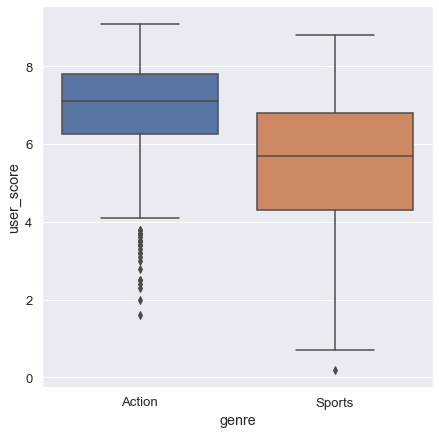

In [79]:
plt.figure(figsize=(7, 7))
sns.boxplot(data=two_genres, x='genre', y='user_score');

Спойлер - скорее всего мы отклоним Нулевую гипотезу :-)

Посмотрим на доверительные интервалы

In [80]:
#Введем переменные для расчета
n_Ac = two_genres.query('genre == "Action"').genre.count()
n_Sp = two_genres.query('genre == "Sports"').genre.count()
std_Ac = statistics.stdev(two_genres.query('genre == "Action"').user_score.tolist())
std_Sp = statistics.stdev(two_genres.query('genre == "Sports"').user_score.tolist())
mean_Ac = statistics.mean(two_genres.query('genre == "Action"').user_score.tolist())
mean_Sp = statistics.mean(two_genres.query('genre == "Sports"').user_score.tolist())

#Напишем формулу
'''
mean(μ) - среднее 
sd - стандартное отклонение в выборке
n - количество выборочных значений
accuracy - точность интервала (может быть равен 95 или 99)
'''

def conf_interval(mean, sd, n, accuracy):
    se = sd/(n**(1/2))
    if accuracy == 95:
        left = mean - se*1.96
        right = mean + se*1.96
        print(f'Доверительный интервал : [{round(left,2)} ; {round(right,2)}]')
    elif accuracy == 99:
        left = mean - se*2.58
        right = mean + se*2.58
        print(f'Доверительный интервал : [{left} ; {right}]')
        

         
print("Доверительные интервалы для Action и Sports соответственно")        
conf_interval(mean_Ac, std_Ac, n_Ac, 95)
conf_interval(mean_Sp, std_Sp, n_Sp, 95)

Доверительные интервалы для Action и Sports соответственно
Доверительный интервал : [6.71 ; 6.94]
Доверительный интервал : [5.21 ; 5.7]


Избавимся от выбросов

In [81]:
q1_Action = two_genres.query('genre =="Action"').user_score.quantile(0.25)
q3_Action = two_genres.query('genre =="Action"').user_score.quantile(0.75)
igr_Action = q3_Action-q1_Action

q1_Sports = two_genres.query('genre =="Sports"').user_score.quantile(0.25)
q3_Sports = two_genres.query('genre =="Sports"').user_score.quantile(0.75)
igr_Sports = q3_Sports-q1_Sports


clean_Action= two_genres[(two_genres["user_score"] <= (q3_Action+1.5*igr_Action)) \
                        & (two_genres["user_score"] >= (q1_Action-1.5*igr_Action)) \
                        & (two_genres["genre"] !="Sports")]
                      
clean_Sports= two_genres[(two_genres["user_score"] <= (q3_Sports+1.5*igr_Sports)) \
                        & (two_genres["user_score"] >= (q1_Sports-1.5*igr_Sports)) \
                        & (two_genres["genre"] !="Action")]

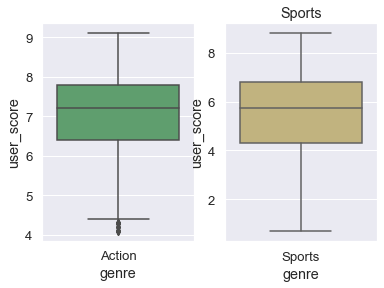

In [82]:
fig, axes = plt.subplots(1, 2)

box_1 = plt.title('Action')
box_1 = sns.boxplot(data=clean_Action, x='genre', y='user_score', ax=axes[0], color='g');
box_2 = plt.title('Sports')
box_2 = sns.boxplot(data=clean_Sports, x='genre', y='user_score', ax = axes[1], color="y");

In [83]:
#Смотрим на дисперсии
print('Дисперсия Action', clean_Action.var().values)
print('Дисперсия Sports',clean_Sports.var().values)

Дисперсия Action [1.20558484]
Дисперсия Sports [2.89468324]


Видим, что дисперсии не равны.

Теперь проверим распределения на нормальность критерием Шапиро-Уилки для каждой выборки. 

Statistics=0.949, p-value=0.000
Отклонить гипотезу о нормальности распределения


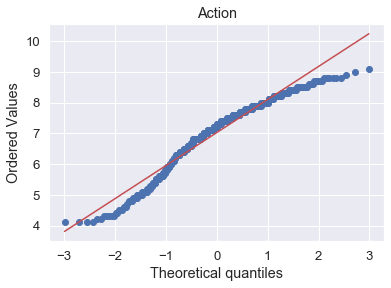

In [84]:
stats.probplot(clean_Action['user_score'] , dist="norm", plot=plt)
plt.title('Action');

stat, p = scipy.stats.shapiro(clean_Action['user_score']) # тест Шапиро-Уилк
print('Statistics=%.3f, p-value=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Принять гипотезу о нормальности распределения')
else:
    print('Отклонить гипотезу о нормальности распределения')

Statistics=0.971, p-value=0.000
Отклонить гипотезу о нормальности распределения


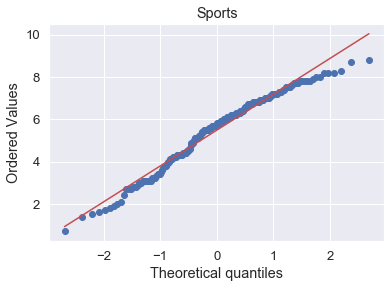

In [85]:
stats.probplot(clean_Sports['user_score'] , dist="norm", plot=plt)
plt.title('Sports');

stat, p = scipy.stats.shapiro(clean_Sports['user_score']) # тест Шапиро-Уилк
print('Statistics=%.3f, p-value=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Принять гипотезу о нормальности распределения')
else:
    print('Отклонить гипотезу о нормальности распределения')

Оба распределения далеки от нормального. 

**Так как нарушены требования к гомогенности дисперсий и к нормальности распределений, лучше применять непараметрический аналог дисперсионного анализа - критерий Краскела-Уоллиса**

Будем использовать alpha = 0.05. Этo низший уровень статистической значимости, рекомендован для небольших выборок.

In [86]:
alpha = 0.05
results = stats.kruskal(clean_Action['user_score'],clean_Sports['user_score'])

print(results)

if (results.pvalue < alpha):
    print("Отвергаем Нулевую гипотезу")
else:
    print("Не получилось отвергнуть Нулевую гипотезу")

KruskalResult(statistic=126.61570870411411, pvalue=2.254652757265361e-29)
Отвергаем Нулевую гипотезу


Как и ожидалось, рейтинги отличаются. Смотрим на сколько

In [87]:
print('Средняя оценка пользователей игр для жанра Action  - {:.2f}'.format(clean_Action['user_score'].mean()))
print('Средняя оценка пользователей игр для жанра Sports - {:.2f}'.format(clean_Sports['user_score'].mean()))

Средняя оценка пользователей игр для жанра Action  - 7.02
Средняя оценка пользователей игр для жанра Sports - 5.48


Да, эта разница в 1,54 уже гораздо существеннее чем предыдущая по платформам в 0,19.

## Вывод <a class="anchor" id="seventh-bullet"></a>
<font size="2">([к содержанию](#0.0))</font>


Как мы видим, люди не перестают играть несмотря на то, что последние годы индустрия существенно просела.

Пользователи больше прислушиваются к оценкам критиков, и как видим, мнение "авторитетов" и в этой индустрии имеет значение. Поэтому производителям для поднятия выручки нужно стараться понравится "лидерам мнений".

Преобладание игр в категории "Для взрослых" не говорит исключительно о "взрослой" целевой аудтории. Наоборот, подросткам, а иногда и даже детям, чаще всего интересны игры скорее с рейтингом 18+, чем разработанные специально для них — детей. 

Лидеры среди Action, Shooter, Sports могут говорить о том, что пользователь мало заинтересован в основательности игры. Ведущие игроки-производители индустрии будут достигать своего за счет внедрения новых технологий, компаниям поменьше остается создавать либо "одноразовые" игры которые выстрелят один раз и забудутся, либо надеятся на создание игры которая внезапно станет глобальным явлением за счет своей идеи.